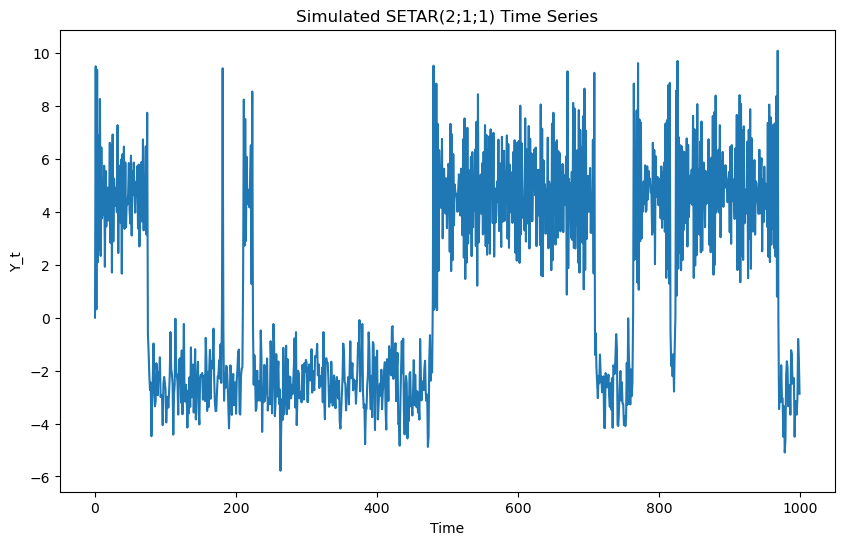

In [ ]:
# Simulate SETAR(2;1;1) 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

a_0_1 = -2
a_1_1 = 0.2
a_0_2 = 9
a_1_2 = -0.9

n = 1000
Y = np.zeros(n)
for t in range(1, n):
    if Y[t-1] < 0:
        Y[t] = a_0_1 + a_1_1* Y[t-1] + np.random.normal()
    else:
        Y[t] = a_0_2 + a_1_2 * Y[t-1] + np.random.normal()
df = pd.DataFrame(Y, columns=['Value'])
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x=df.index, y='Value')
plt.title('Simulated SETAR(2;1;1) Time Series')
plt.xlabel('Time')
plt.ylabel('Y_t')
plt.show()

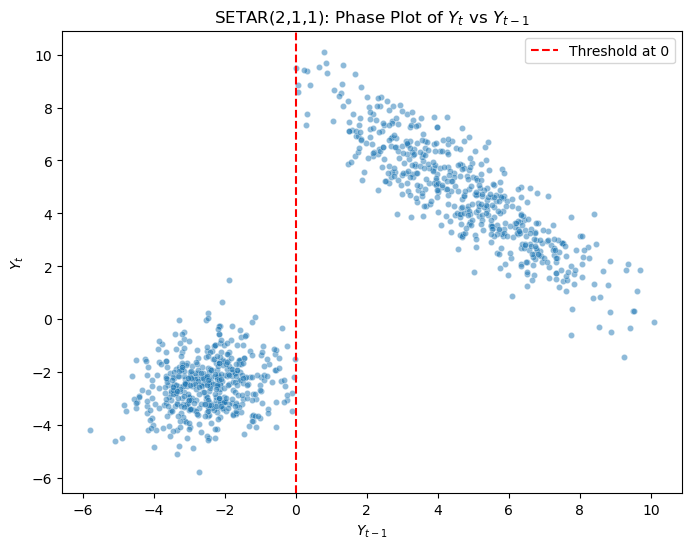

In [52]:
# Plot X vs X-1

df = pd.DataFrame({"Y_t": Y[1:], "Y_t-1": Y[:-1]})

# Scatter plot of Y_t vs Y_t-1
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Y_t-1", y="Y_t", alpha=0.5, s=20)
plt.axvline(0, color="red", linestyle="--", label="Threshold at 0")
plt.title("SETAR(2,1,1): Phase Plot of $Y_t$ vs $Y_{t-1}$")
plt.xlabel("$Y_{t-1}$")
plt.ylabel("$Y_t$")
plt.legend()

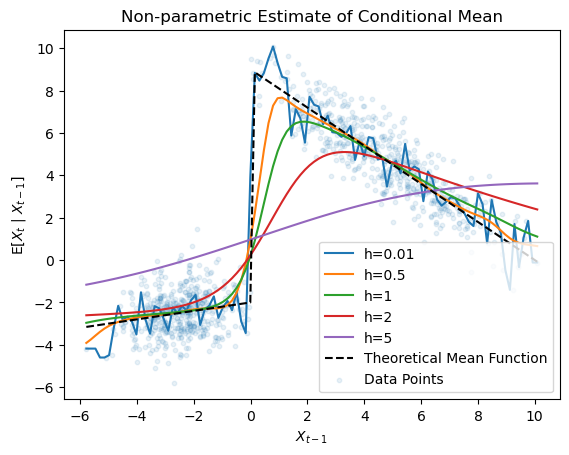

In [ ]:
def weight_func(u):
    if abs(u) <= 1:
        return 0.5
    else:
        return 0.00000001
    
def kernel(x, kernel_function = 'gaussian'):
    # Make each kernel selectable
    if kernel_function == 'rectangular':
        return 1 / 2 * ((x >= -1) & (x <= 1)).astype(float)
    else:
        return np.exp(-0.5 * x**2) / np.sqrt(2 * np.pi)

def conditional_mean(y, h=10, df=df):
    Expectation = sum(kernel((y-Y_s)/h)*Z_s for Y_s, Z_s in zip(df["Y_t-1"], df["Y_t"])) / sum(kernel((y-Y_s)/h) for Y_s in df["Y_t-1"])
    return Expectation

# Plot non-parametric estimate of conditional mean function for different bandwidths using Gaussian kernel
x = np.linspace(min(df["Y_t-1"]), max(df["Y_t-1"]), 100)
for h in [0.01, 0.5, 1, 2, 5]:
    ys = [conditional_mean(xi, h=h) for xi in x]
    plt.plot(x, ys, label=f"h={h}")
ys = [conditional_mean(xi, h=1) for xi in x]
#plt.plot(x, ys)
# plot theoretical mean function
theoretical_mean = [a_0_1 + a_1_1*xi if xi < 0 else a_0_2 + a_1_2*xi for xi in x]
plt.plot(x, theoretical_mean, color="black", linestyle="--", label="Theoretical Mean Function")

# plot data
plt.scatter(df["Y_t-1"], df["Y_t"], alpha=0.1, s=10, label="Data Points")

plt.title("Non-parametric Estimate of Conditional Mean")
plt.xlabel("$X_{t-1}$")
plt.ylabel("E[$X_t$ | $X_{t-1}$]")
plt.legend()
plt.show()

/var/folders/ql/h53w_qjs60509nsf4jbr01c00000gn/T/ipykernel_95601/224907655.py:2: RuntimeWarning: invalid value encountered in double_scalars
  Expectation = sum(kernel((y-Y_s)/h, kernel_function = "rectangular")*Z_s for Y_s, Z_s in zip(df["Y_t-1"], df["Y_t"])) / sum(kernel((y-Y_s)/h, kernel_function="rectangular") for Y_s in df["Y_t-1"])


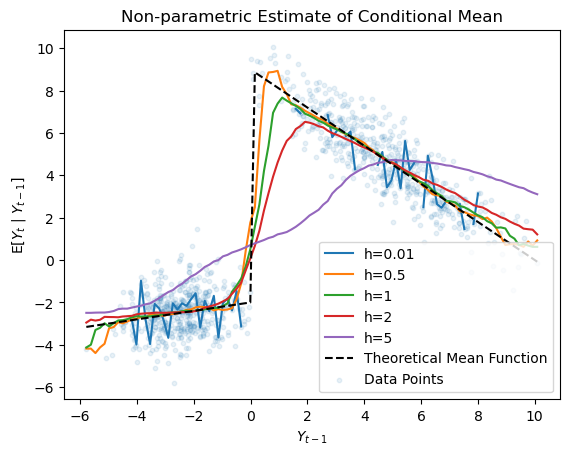

In [ ]:
def conditional_mean(y, h=10, df=df):
    Expectation = sum(kernel((y-Y_s)/h, kernel_function = "rectangular")*Z_s for Y_s, Z_s in zip(df["Y_t-1"], df["Y_t"])) / sum(kernel((y-Y_s)/h, kernel_function="rectangular") for Y_s in df["Y_t-1"])
    return Expectation

# Use rectangular kernel
x = np.linspace(min(df["Y_t-1"]), max(df["Y_t-1"]), 100)
for h in [0.01, 0.5, 1, 2, 5] :
    ys = [conditional_mean(xi, h=h) for xi in x]
    plt.plot(x, ys, label=f"h={h}")
ys = [conditional_mean(xi, h=1) for xi in x]


# plot theoretical mean function
theoretical_mean = [a_0_1 + a_1_1*xi if xi < 0 else a_0_2 + a_1_2*xi for xi in x]
plt.plot(x, theoretical_mean, color="black", linestyle="--", label="Theoretical Mean Function")

# plot data
plt.scatter(df["Y_t-1"], df["Y_t"], alpha=0.1, s=10, label="Data Points")
plt.title("Non-parametric Estimate of Conditional Mean")
plt.xlabel("$Y_{t-1}$")
plt.ylabel("E[$Y_t$ | $Y_{t-1}$]")
plt.legend()
plt.show()